# **PREDICTION OF EMPLOYEE ATTRITION USING MACHINE AND DEEP LEARNING.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
file_name = "https://raw.githubusercontent.com/ram2203/Masters-Project/main/Emp_data.csv"
data1 = pd.read_csv(file_name)
#data1 = pd.read_csv('Emp_data.csv') 
data1.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,3794,2,160,3,1,1,1,sales,low
1,1506,4,139,3,0,1,1,management,low
2,2016,2,160,3,0,1,1,sales,low
3,2773,6,292,4,0,1,1,technical,low
4,4300,2,154,3,0,1,1,support,medium


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [4]:
file_name2 = "https://raw.githubusercontent.com/ram2203/Masters-Project/main/Employee_Satisfaction_Data.csv"
data2 = pd.read_csv(file_name2)
#data2 = pd.read_excel ('/content/Employee_Satisfaction_Data.xlsx') 
data2.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [5]:
data2.info

<bound method DataFrame.info of        EMPLOYEE #  satisfaction_level  last_evaluation
0            1003                0.38             0.53
1            1005                0.80             0.86
2            1486                0.11             0.88
3            1038                0.72             0.87
4            1057                0.37             0.52
...           ...                 ...              ...
14994       87670                0.40             0.57
14995       87673                0.37             0.48
14996       87679                0.37             0.53
14997       87681                0.11             0.96
14998       87684                0.37             0.52

[14999 rows x 3 columns]>

In [6]:
print(data1.select_dtypes(exclude=['int', 'float']).columns)

Index(['department', 'salary'], dtype='object')


# Joining two files to get the Satisfactory Data


In [7]:
Data = data1.set_index('employee_id').join(data2.set_index('EMPLOYEE #'))
Data = Data.reset_index()

In [8]:
Data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,3794,2,160,3,1,1,1,sales,low,NaN,NaN
1,1506,4,139,3,0,1,1,management,low,0.79,0.59
2,2016,2,160,3,0,1,1,sales,low,0.41,0.46
3,2773,6,292,4,0,1,1,technical,low,0.11,0.79
4,4300,2,154,3,0,1,1,support,medium,0.41,0.56


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [10]:
print(Data['department'].unique())
print(Data['salary'].unique())

['sales' 'management' 'technical' 'support' 'IT' 'RandD' 'marketing'
 'accounting' 'hr' 'product_mng']
['low' 'medium' 'high']


# Data Cleaning

In [11]:
Data['department'].replace({'sales' : 'Sales', 'management': "Management", 'technical' : "Technical", 'support' : "Support", 'IT' : "IT", 'RandD': "R & D", 'marketing' : "Marketing",
 'accounting': "Accounting", 'hr':"HR", 'product_mng':"Product_Management"}, inplace= True)

In [12]:
Data['salary'].replace({'low': 'LOW', 'medium':'MEDIUM', 'high':'HIGH'}, inplace= True)

In [13]:
Data.columns = ['Employee_ID','Project_Count', 'Avg_Monthly_Hours', 'Years_Spend_Company', 'Work_Accidents','Resigned', 'Promotion_Last_5Years', 'Department','Salary_Level', 'Satisfaction_Level', 'Last_Evaluation']

In [14]:
len(Data.columns)

11

In [15]:
Data= Data[['Employee_ID', 'Project_Count', 'Avg_Monthly_Hours','Years_Spend_Company', 'Work_Accidents','Promotion_Last_5Years', 'Department', 'Salary_Level', 'Satisfaction_Level',
            'Last_Evaluation', 'Resigned']]

In [16]:
Data.head()

,Employee_ID,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,3794,2,160,3,1,1,Sales,LOW,NaN,NaN,1
1,1506,4,139,3,0,1,Management,LOW,0.79,0.59,1
2,2016,2,160,3,0,1,Sales,LOW,0.41,0.46,1
3,2773,6,292,4,0,1,Technical,LOW,0.11,0.79,1
4,4300,2,154,3,0,1,Support,MEDIUM,0.41,0.56,1


# Replacing Nulls with Mean Values ( IMPUTATION)

In [17]:
Data[Data.isnull().any(axis=1)].head(10)

,Employee_ID,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,3794,2,160,3,1,1,Sales,LOW,NaN,NaN,1
247,78780,3,207,7,0,1,Management,MEDIUM,0.58,NaN,0
337,1140,5,262,5,0,0,Sales,LOW,NaN,0.89,1
351,1230,2,140,3,0,0,HR,LOW,NaN,NaN,1
371,1340,2,132,3,0,0,Support,LOW,NaN,NaN,1
390,22316,2,149,3,0,0,Product_Management,HIGH,NaN,NaN,1
409,1581,2,143,3,0,0,Sales,LOW,NaN,NaN,1
424,17376,2,148,3,0,0,Accounting,MEDIUM,NaN,NaN,1
437,1739,4,158,4,1,0,Technical,LOW,NaN,NaN,1
454,1847,2,129,3,0,0,Management,LOW,NaN,NaN,1


In [18]:
Data.fillna(Data.mean(), inplace=True)
#Data.head()

In [19]:
Final_Dataset = Data.drop(columns='Employee_ID')
Final_Dataset.head()

,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,2,160,3,1,1,Sales,LOW,0.61283,0.716125,1
1,4,139,3,0,1,Management,LOW,0.79000,0.590000,1
2,2,160,3,0,1,Sales,LOW,0.41000,0.460000,1
3,6,292,4,0,1,Technical,LOW,0.11000,0.790000,1
4,2,154,3,0,1,Support,MEDIUM,0.41000,0.560000,1


In [20]:
Final_Dataset.groupby('Department').sum()

,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Satisfaction_Level,Last_Evaluation,Resigned
Department,,,,,,,,
Accounting,2934,154292,2702,96,14,446.68283,550.706125,204
HR,2701,146828,2480,89,15,442.53566,524.006125,215
IT,4683,248119,4256,164,3,758.17283,879.452250,273
Management,2432,126787,2711,103,69,391.76566,456.234499,91
Marketing,3164,171073,3063,138,43,530.62283,613.946125,203
Product_Management,3434,180369,3135,132,0,559.19566,644.662250,198
R & D,3033,158030,2650,134,27,487.80000,560.446125,121
Sales,15634,831773,14631,587,100,2543.77981,2938.236749,1014
Support,8479,447490,7563,345,20,1377.90849,1611.534499,555


In [21]:
Counts= Final_Dataset['Resigned'].value_counts()

# Exploratory Data Analysis 

0    11428
1     3571
Name: Resigned, dtype: int64


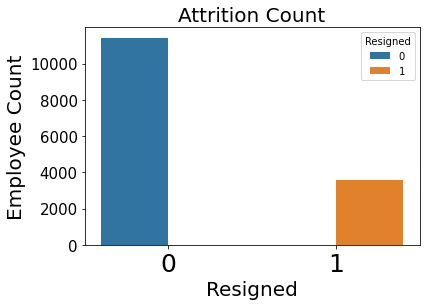

In [22]:
sns.countplot(x='Resigned', hue= 'Resigned', data=Final_Dataset )
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.xlabel('Resigned', fontsize=20)
plt.ylabel('Employee Count', fontsize=20)
plt.title('Attrition Count', fontsize=20)
print(Counts)

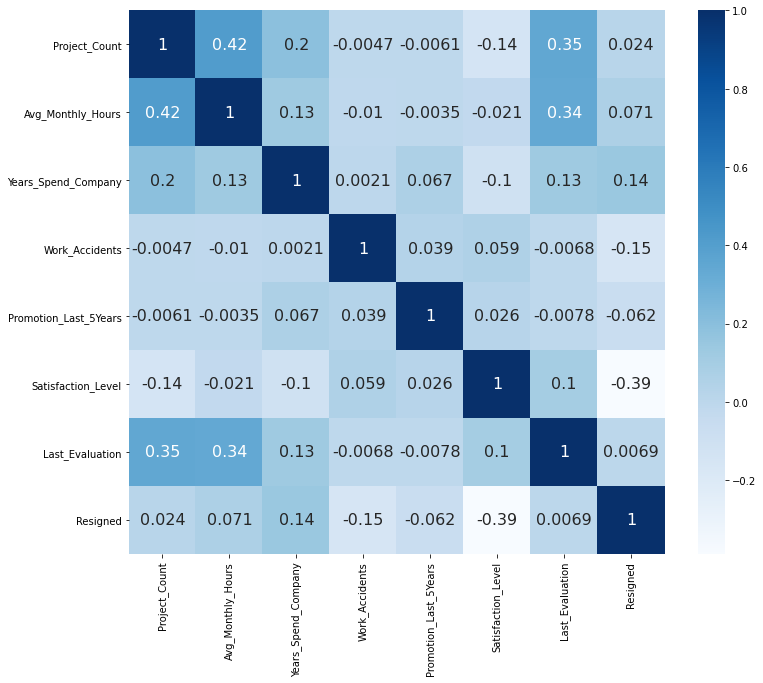

In [23]:
import matplotlib.pyplot as plt
correlation_matrix=Final_Dataset.corr()
f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(correlation_matrix,annot = True, cmap="Blues", annot_kws={"size": 16})
sns.set(font_scale=1.5)

In [24]:
Employee_left=Final_Dataset[Final_Dataset['Resigned']==1]
Employee_stayed=Final_Dataset[Final_Dataset['Resigned']==0]

Text(0, 0.5, 'Density')

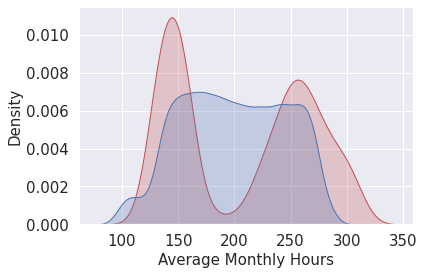

In [25]:
sns.kdeplot(Employee_left['Avg_Monthly_Hours'], label = 'Left Employees', shade= True, color = 'r')
sns.kdeplot(Employee_stayed['Avg_Monthly_Hours'], label = 'Stayed Employees', shade= True, color = 'b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Average Monthly Hours', fontsize=15)
plt.ylabel('Density', fontsize=15)
#plt.title('Attrition Count', fontsize=20)

Text(0, 0.5, 'Density')

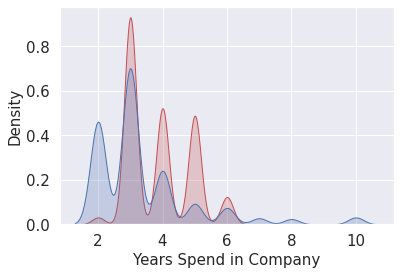

In [26]:
sns.kdeplot(Employee_left['Years_Spend_Company'], label = 'Left Employees', shade= True, color = 'r')
sns.kdeplot(Employee_stayed['Years_Spend_Company'], label = 'Stayed Employees', shade= True, color = 'b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Years Spend in Company', fontsize=15)
plt.ylabel('Density', fontsize=15)
#plt.title('Attrition Count', fontsize=20)

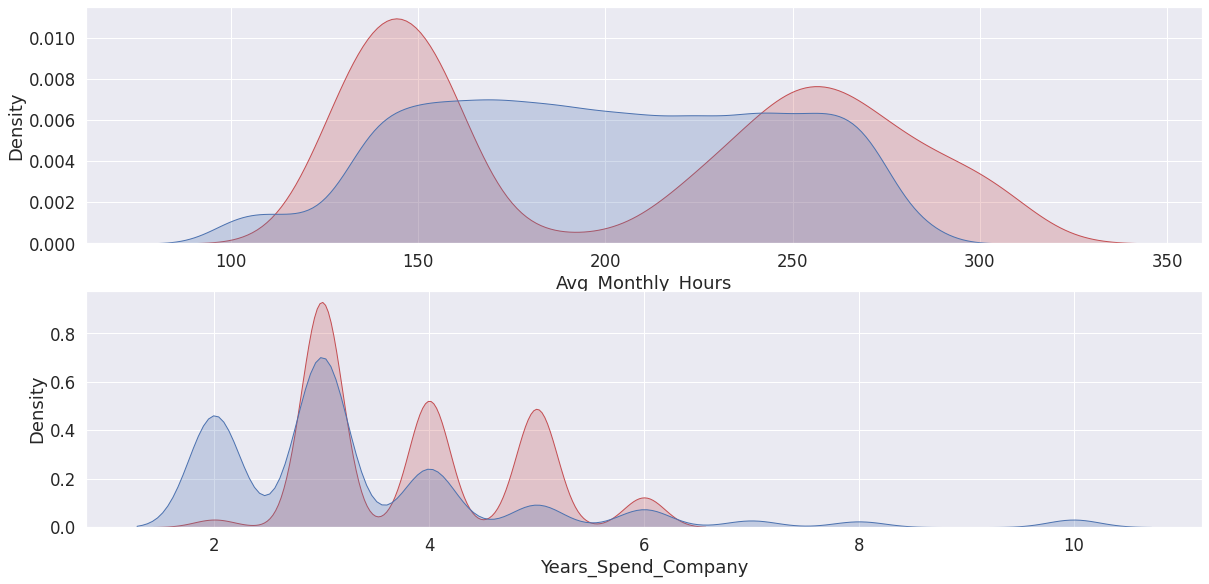

In [27]:
plt.figure(figsize=[20, 20])
plt.subplot(411)
sns.kdeplot(Employee_left['Avg_Monthly_Hours'], label = 'Left Employees', shade= True, color = 'r')
sns.kdeplot(Employee_stayed['Avg_Monthly_Hours'], label = 'Stayed Employees', shade= True, color = 'b')
plt.subplot(412)
sns.kdeplot(Employee_left['Years_Spend_Company'], label = 'Left Employees', shade= True, color = 'r')
sns.kdeplot(Employee_stayed['Years_Spend_Company'], label = 'Stayed Employees', shade= True, color = 'b')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

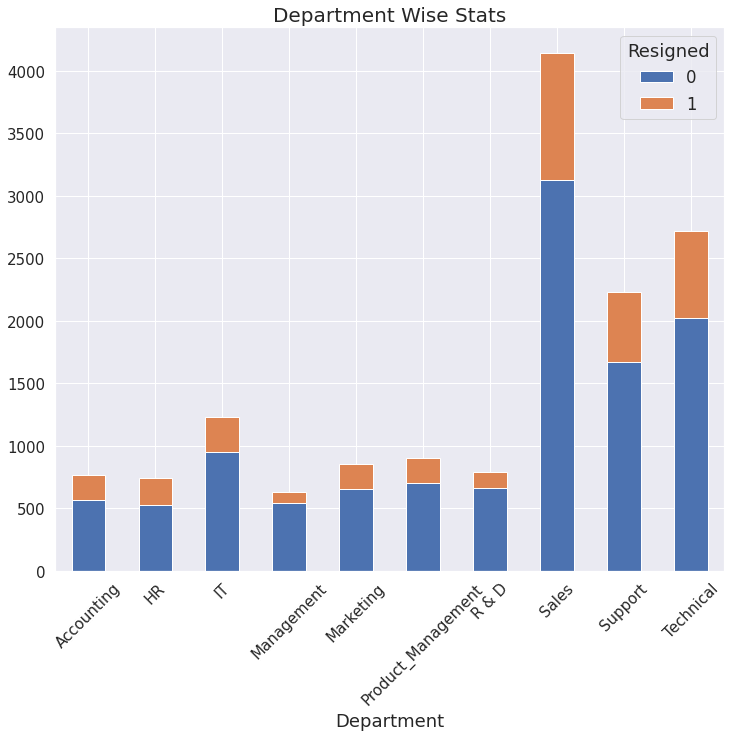

In [28]:
from matplotlib import pyplot as plt

data = Final_Dataset
agg_dep = data.groupby(['Department', 'Resigned'])['Resigned'].count().unstack().fillna(0)
agg_dep.plot(kind='bar', stacked=True, figsize=(12,10))
plt.title('Department Wise Stats', fontsize = 20)
plt.xticks(rotation=45, ha='center',fontsize=15)
plt.yticks(fontsize=15)


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text major ticklabel objects>)

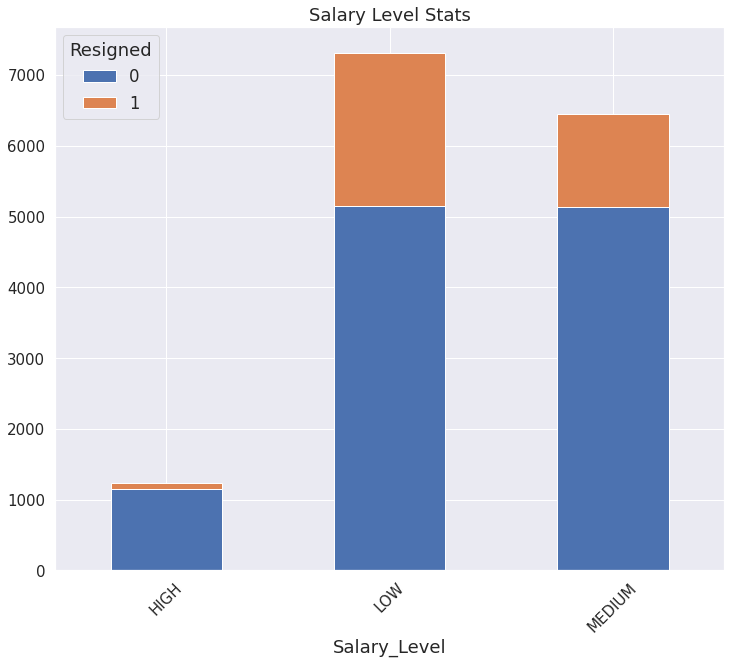

In [29]:
data = Final_Dataset
agg_sal = data.groupby(['Salary_Level', 'Resigned'])['Resigned'].count().unstack().fillna(0)
agg_sal.plot(kind='bar', stacked=True, figsize=(12,10))
plt.title('Salary Level Stats')
plt.xticks(rotation=45, ha='center',fontsize=15)
plt.yticks(fontsize=15)


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

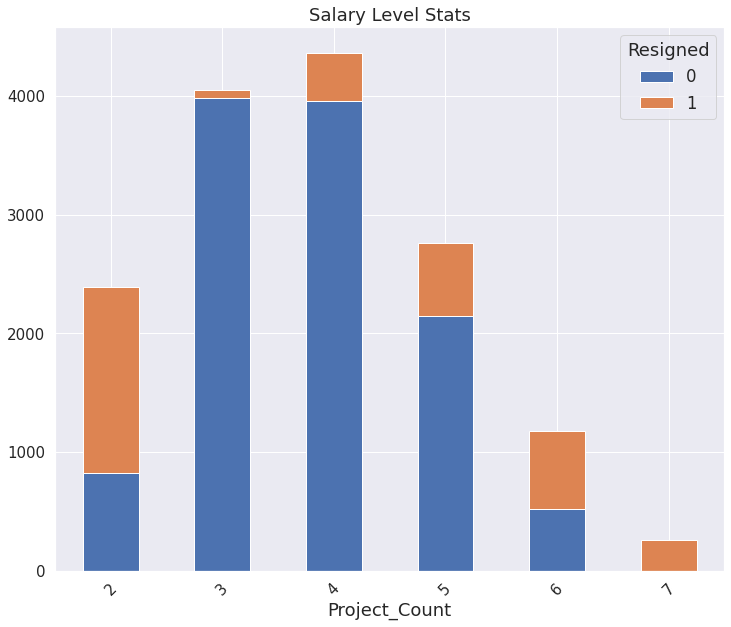

In [30]:
data = Final_Dataset
agg_pc = data.groupby(['Project_Count', 'Resigned'])['Resigned'].count().unstack().fillna(0)
agg_pc.plot(kind='bar', stacked=True, figsize=(12,10))
plt.title('Salary Level Stats')
plt.xticks(rotation=45, ha='center',fontsize=15)
plt.yticks(fontsize=15)


In [31]:
categorical_columns = ['Department','Salary_Level']
Final_Dataset_encoded=pd.get_dummies(Final_Dataset,columns=categorical_columns,drop_first=True)

### **Observations from the Above Graphs:**

1. Sales Department has more attrition then we can see that Technical department has next highest attrition rate.

2. Employees with Low Salary has more attrition.

3. Satisfaction levels with less than 10% are tend to shift from one company to another and then we see that from 35 to 45 we see slight increase in attrition level


In [32]:
Final_Dataset.head()

,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,2,160,3,1,1,Sales,LOW,0.61283,0.716125,1
1,4,139,3,0,1,Management,LOW,0.79000,0.590000,1
2,2,160,3,0,1,Sales,LOW,0.41000,0.460000,1
3,6,292,4,0,1,Technical,LOW,0.11000,0.790000,1
4,2,154,3,0,1,Support,MEDIUM,0.41000,0.560000,1


In [33]:
len(Final_Dataset_encoded.columns)

19

# **Removing the target label from the Dataset**


In [34]:
Data_without_label = Final_Dataset_encoded.drop(['Resigned'],axis=1 ).values
Label_data = Final_Dataset_encoded['Resigned'].values

# **Splitting the data into Training and Testing**

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
Train_X, Test_X, Train_Y,Test_Y = train_test_split(Data_without_label,Label_data, test_size=0.3)

# **Normalising the Data using the standard Scalar**

In [37]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
Train_X = sc.fit_transform(Train_X)
Test_X = sc.transform(Test_X)

In [38]:
Train_df=pd.DataFrame(Train_X)
Train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.994347,1.271324,-0.342661,-0.406841,-0.151642,-1.395378,0.209305,-0.228506,-0.297752,-0.212595,-0.24663,-0.251804,-0.236696,-0.614819,-0.416492,2.113145,-0.982345,1.159332
1,-0.638762,-0.549461,1.020066,-0.406841,-0.151642,-0.950375,0.326759,-0.228506,-0.297752,-0.212595,-0.24663,-0.251804,-0.236696,-0.614819,2.401004,-0.473228,-0.982345,1.159332
2,0.994347,-0.269340,-1.024025,-0.406841,-0.151642,-1.435833,-1.552507,-0.228506,-0.297752,-0.212595,-0.24663,-0.251804,-0.236696,1.626495,-0.416492,-0.473228,1.017973,-0.862566
3,0.177793,-0.429409,-0.342661,-0.406841,-0.151642,1.072368,0.561667,-0.228506,-0.297752,4.703780,-0.24663,-0.251804,-0.236696,-0.614819,-0.416492,-0.473228,-0.982345,-0.862566
4,-0.638762,0.951186,-0.342661,-0.406841,-0.151642,0.586910,-1.141418,-0.228506,-0.297752,-0.212595,-0.24663,-0.251804,4.224830,-0.614819,-0.416492,-0.473228,-0.982345,1.159332


# **Training Using the Logistic Regression Model**

Accuracy for the Logistic model is : 79.15555555555555


Confusion Matrix for Logistic Model is: 
[[3177  253]
 [ 685  385]]


Classification Report for Logistic model is:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3430
           1       0.60      0.36      0.45      1070

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



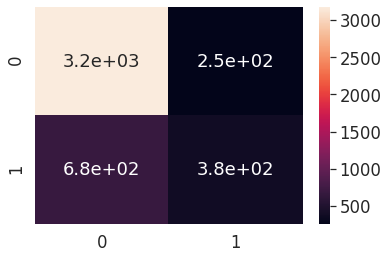

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(Train_X,Train_Y)
predictions = model.predict(Test_X)
accuracy = format(100*accuracy_score(predictions, Test_Y))
print("Accuracy for the Logistic model is : " + str(accuracy))
print('\n')
print('Confusion Matrix for Logistic Model is: ')
print(confusion_matrix(Test_Y,predictions))
print('\n')
print("Classification Report for Logistic model is:")
print(classification_report(Test_Y,predictions))

cf_matrix = confusion_matrix(Test_Y,predictions)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# **Trainning Using the SVM Model**

Accuracy for the SVM model is : 78.37777777777778


Confusion Matrix for SVM Model is: 
[[3226  204]
 [ 769  301]]


Classification Report for SVM model is:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3430
           1       0.60      0.28      0.38      1070

    accuracy                           0.78      4500
   macro avg       0.70      0.61      0.63      4500
weighted avg       0.76      0.78      0.75      4500



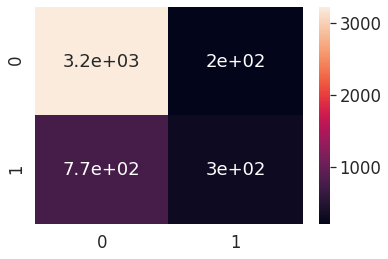

In [40]:
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svclassifier = SVC(kernel='linear')
svclassifier.fit(Train_X,Train_Y)

predictions = svclassifier.predict(Test_X)
accuracy = format(100*accuracy_score(predictions, Test_Y))

print("Accuracy for the SVM model is : " + str(accuracy))
print('\n')
print('Confusion Matrix for SVM Model is: ')
print(confusion_matrix(Test_Y,predictions))
print('\n')
print("Classification Report for SVM model is:")
print(classification_report(Test_Y,predictions))

cf_matrix = confusion_matrix(Test_Y,predictions)


import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# **Trainning Using the GradientBoosting Classifier Model**

Accuracy for the GradientBoosting Classifier model is : 97.6


Confusion Matrix for GradientBoosting Classifier Model is: 
[[3397   33]
 [  75  995]]


Classification Report for GradientBoosting Classifier model is:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3430
           1       0.97      0.93      0.95      1070

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



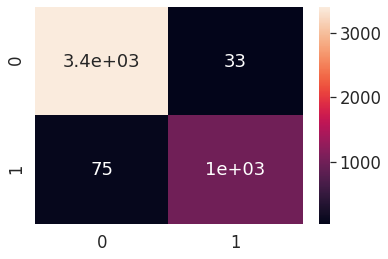

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(Train_X, Train_Y)

predictions = model.predict(Test_X)

predictions = model.predict(Test_X)
accuracy = format(100*accuracy_score(predictions, Test_Y))
print("Accuracy for the GradientBoosting Classifier model is : " + str(accuracy))
print('\n')
print('Confusion Matrix for GradientBoosting Classifier Model is: ')
print(confusion_matrix(Test_Y,predictions))
print('\n')
print("Classification Report for GradientBoosting Classifier model is:")
print(classification_report(Test_Y,predictions))

cf_matrix = confusion_matrix(Test_Y,predictions)


import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# **Trainning Using the Random Forest Classifier Model**


Accuracy for the Random Forest Classifier model is : 98.86666666666667


Confusion Matrix for Random Forest Classifier Model is: 
[[3419   11]
 [  40 1030]]


Classification Report for Random Forest Classifier model is:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3430
           1       0.99      0.96      0.98      1070

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



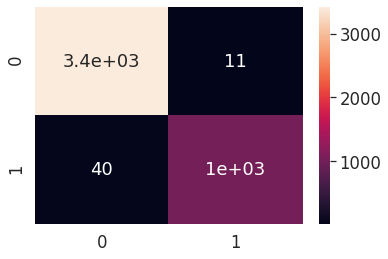

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  

model = RandomForestClassifier()
model.fit(Train_X, Train_Y)
predictions = model.predict(Test_X)
score = model.score(Test_X, Test_Y)
accuracy = format(100*accuracy_score(predictions, Test_Y))
print("Accuracy for the Random Forest Classifier model is : " + str(accuracy))
print('\n')
print('Confusion Matrix for Random Forest Classifier Model is: ')
print(confusion_matrix(Test_Y,predictions))
print('\n')
print("Classification Report for Random Forest Classifier model is:")
print(classification_report(Test_Y,predictions))

cf_matrix = confusion_matrix(Test_Y,predictions)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [43]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(Train_X).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.311650
2,0.185465
0,0.182346
1,0.152238
6,0.124576
3,0.009910
16,0.007819
17,0.003953
15,0.003535
13,0.003491


# **Decison Tree Analysis**

In [44]:
!pip install graphviz
!pip install scikit-learn

In [45]:
Data.head()

,Employee_ID,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,3794,2,160,3,1,1,Sales,LOW,0.61283,0.716125,1
1,1506,4,139,3,0,1,Management,LOW,0.79000,0.590000,1
2,2016,2,160,3,0,1,Sales,LOW,0.41000,0.460000,1
3,2773,6,292,4,0,1,Technical,LOW,0.11000,0.790000,1
4,4300,2,154,3,0,1,Support,MEDIUM,0.41000,0.560000,1


In [46]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()

In [47]:
import copy
main_copy = copy.deepcopy(Data)
y = main_copy['Resigned']
x = main_copy
del x['Resigned']
del x['Employee_ID']
x.head()

,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation
0,2,160,3,1,1,Sales,LOW,0.61283,0.716125
1,4,139,3,0,1,Management,LOW,0.79000,0.590000
2,2,160,3,0,1,Sales,LOW,0.41000,0.460000
3,6,292,4,0,1,Technical,LOW,0.11000,0.790000
4,2,154,3,0,1,Support,MEDIUM,0.41000,0.560000


In [48]:
from sklearn.preprocessing import LabelEncoder

departEncoder = LabelEncoder()
salEncoder = LabelEncoder()
x['Department'] = departEncoder.fit_transform(x['Department'])
x['Salary_Level'] = salEncoder.fit_transform(x['Salary_Level'])

In [49]:
feature_cols = ['number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','department','salary','satisfaction_level','last_evaluation' ]

In [50]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(max_depth=3,min_samples_split=2,criterion="gini",random_state=2)

In [51]:
treeclassifier.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [52]:
export_graphviz(treeclassifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

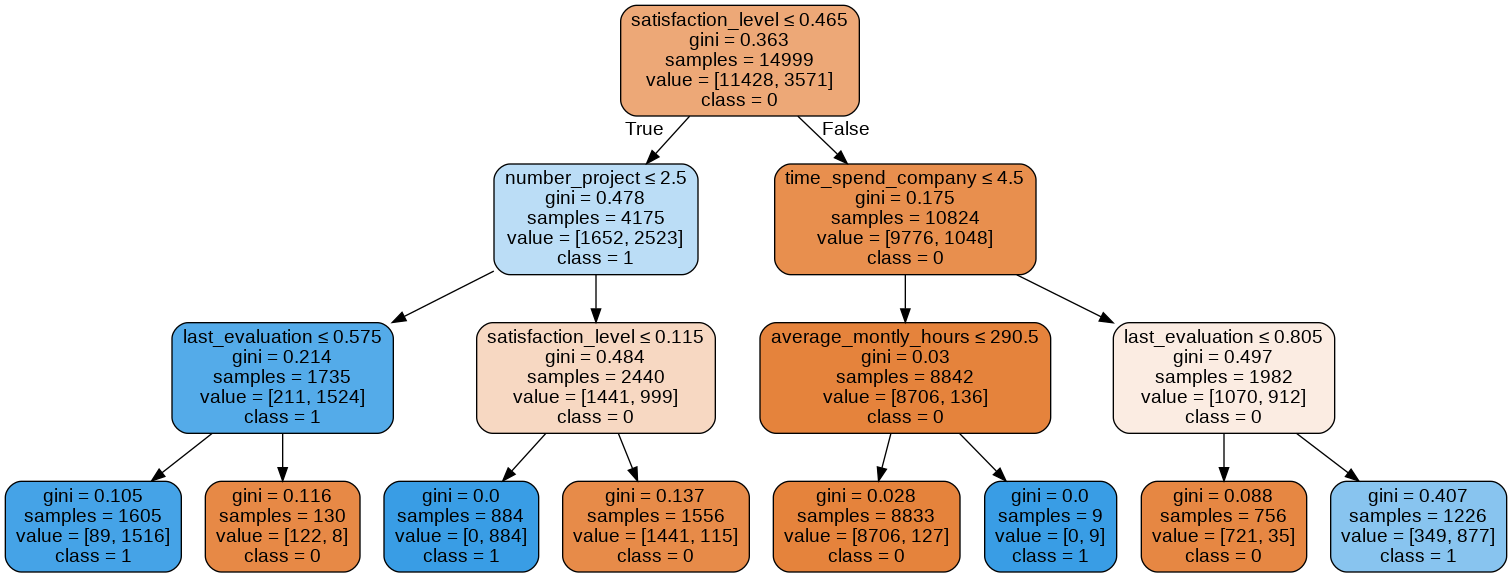

In [53]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Implementing Deep Learning

In [54]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()
model.add(Dense(9, kernel_initializer= "uniform", activation="relu", input_dim=18)) 
model.add(Dense(1,kernel_initializer= "uniform",activation="sigmoid"))

model.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [56]:
history=model.fit(Train_X,Train_Y,batch_size=10 , epochs= 10,verbose=1, validation_data=(Test_X,Test_Y))
score=model.evaluate(Test_X,Test_Y,verbose=0)
print( 'Loss: ',score[0])
print('Accuracy: ',score[1])

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.4141 - accuracy: 0.8230 - val_loss: 0.2859 - val_accuracy: 0.8880
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2319 - accuracy: 0.9217 - val_loss: 0.2087 - val_accuracy: 0.9391
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1838 - accuracy: 0.9447 - val_loss: 0.1848 - val_accuracy: 0.9469
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1683 - accuracy: 0.9509 - val_loss: 0.1775 - val_accuracy: 0.9491
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1622 - accuracy: 0.9520 - val_loss: 0.1736 - val_accuracy: 0.9507
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1590 - accuracy: 0.9524 - val_loss: 0.1716 - val_accuracy: 0.9533
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1572 - accuracy: 0.9534 - val_loss: 0.1698 - val_accuracy:

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Accuracy for the Random Forest Classifier model is : 0.9528889060020447
[[3322  108]
 [ 104  966]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3430
           1       0.90      0.90      0.90      1070

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



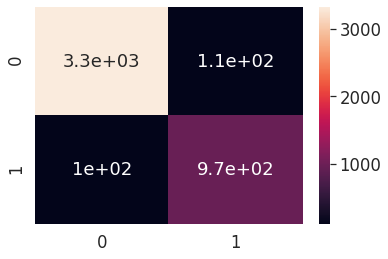

In [58]:
pred=model.predict(Test_X)
pred=(pred > 0.5)

print("Accuracy for the Random Forest Classifier model is : " + str(score[1]))
print(confusion_matrix(Test_Y,pred))
print(classification_report(Test_Y,pred))

cf_matrix = confusion_matrix(Test_Y,pred)


import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Implementing with Pycaret Package

In [59]:
#!pip install pycaret

In [60]:
from pycaret.classification import *

In [61]:
Data.head()

,Employee_ID,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,3794,2,160,3,1,1,Sales,LOW,0.61283,0.716125,1
1,1506,4,139,3,0,1,Management,LOW,0.79000,0.590000,1
2,2016,2,160,3,0,1,Sales,LOW,0.41000,0.460000,1
3,2773,6,292,4,0,1,Technical,LOW,0.11000,0.790000,1
4,4300,2,154,3,0,1,Support,MEDIUM,0.41000,0.560000,1


In [62]:
import copy
main_copy = copy.deepcopy(Data)
y = main_copy['Resigned']
x = main_copy
del x['Employee_ID']
x.head()

,Project_Count,Avg_Monthly_Hours,Years_Spend_Company,Work_Accidents,Promotion_Last_5Years,Department,Salary_Level,Satisfaction_Level,Last_Evaluation,Resigned
0,2,160,3,1,1,Sales,LOW,0.61283,0.716125,1
1,4,139,3,0,1,Management,LOW,0.79000,0.590000,1
2,2,160,3,0,1,Sales,LOW,0.41000,0.460000,1
3,6,292,4,0,1,Technical,LOW,0.11000,0.790000,1
4,2,154,3,0,1,Support,MEDIUM,0.41000,0.560000,1


In [63]:
clf = setup(data=x,target='Resigned',session_id=123,categorical_features=['Department','Salary_Level'])

,Description,Value
0,session_id,123
1,Target,Resigned
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14999, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [64]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9878,0.9925,0.9587,0.9897,0.9739,0.9660,0.9662,0.979
lightgbm,Light Gradient Boosting Machine,0.9857,0.9941,0.9535,0.9859,0.9694,0.9601,0.9603,0.220
et,Extra Trees Classifier,0.9827,0.9918,0.9555,0.9711,0.9632,0.9519,0.9520,0.926
dt,Decision Tree Classifier,0.9757,0.9723,0.9659,0.9348,0.9499,0.9339,0.9343,0.062
gbc,Gradient Boosting Classifier,0.9751,0.9877,0.9230,0.9710,0.9464,0.9302,0.9308,1.001
ada,Ada Boost Classifier,0.9575,0.9818,0.9002,0.9195,0.9097,0.8819,0.8820,0.385
knn,K Neighbors Classifier,0.9311,0.9697,0.8994,0.8264,0.8612,0.8155,0.8170,0.176
lr,Logistic Regression,0.8949,0.9369,0.7904,0.7729,0.7815,0.7123,0.7125,0.927
ridge,Ridge Classifier,0.8807,0.0000,0.7972,0.7270,0.7604,0.6811,0.6825,0.038
lda,Linear Discriminant Analysis,0.8795,0.9282,0.8277,0.7122,0.7655,0.6851,0.6886,0.080


In [65]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [66]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.9839,0.9438,0.9792,0.9611,0.9494,0.9496
1,0.9848,0.9969,0.9478,0.9874,0.9672,0.9573,0.9576
2,0.9876,0.9905,0.9639,0.9836,0.9736,0.9655,0.9656
3,0.9876,0.9886,0.9518,0.9958,0.9733,0.9653,0.9657
4,0.9886,0.9909,0.9600,0.9917,0.9756,0.9681,0.9684
5,0.9933,0.9963,0.9720,1.0000,0.9858,0.9814,0.9816
6,0.9886,0.9939,0.9640,0.9877,0.9757,0.9682,0.9684
7,0.9924,0.9939,0.9760,0.9919,0.9839,0.9789,0.9789
8,0.9848,0.9945,0.9440,0.9916,0.9672,0.9573,0.9578
9,0.9886,0.9952,0.9639,0.9877,0.9756,0.9681,0.9683


In [67]:
tuned = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9724,0.9652,0.9076,0.9741,0.9397,0.9218,0.9228
1,0.9705,0.9709,0.9157,0.9580,0.9363,0.9171,0.9175
2,0.9714,0.9696,0.9116,0.9660,0.9380,0.9195,0.9201
3,0.9743,0.9674,0.9076,0.9826,0.9436,0.9270,0.9282
4,0.9743,0.9786,0.9320,0.9588,0.9452,0.9284,0.9286
5,0.9800,0.9849,0.9360,0.9791,0.9571,0.9440,0.9444
6,0.9762,0.9811,0.9240,0.9747,0.9487,0.9332,0.9337
7,0.9724,0.9805,0.9200,0.9623,0.9407,0.9227,0.9231
8,0.9733,0.9696,0.9200,0.9664,0.9426,0.9253,0.9257
9,0.9752,0.9748,0.9317,0.9627,0.9469,0.9308,0.9310


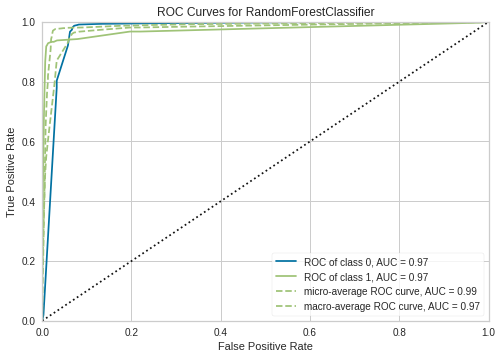

In [68]:
plot_model(tuned,plot='auc')

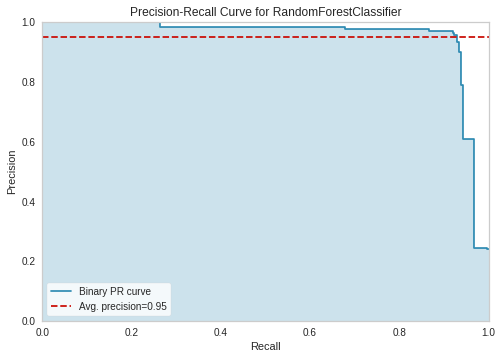

In [69]:
plot_model(tuned, plot = 'pr')

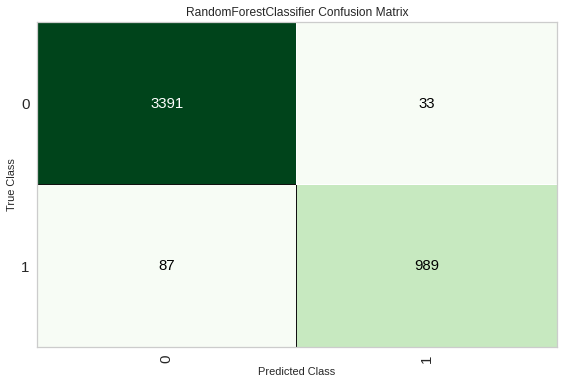

In [70]:
plot_model(tuned, plot = 'confusion_matrix')

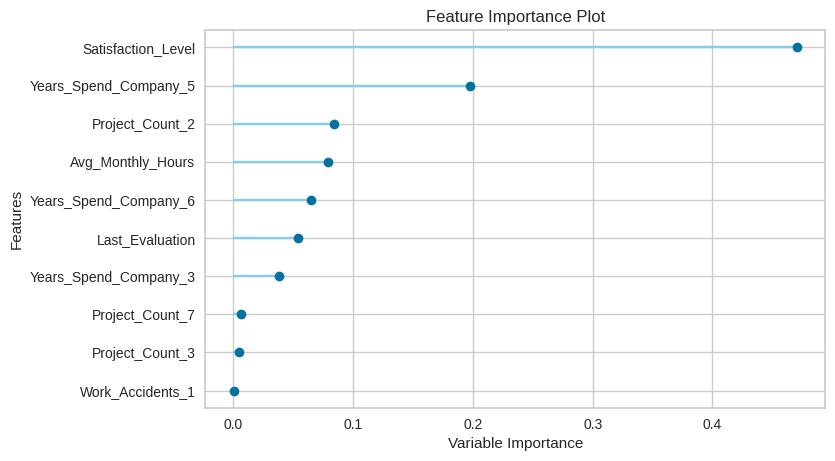

In [71]:
plot_model(tuned, plot = 'feature')